In [2]:
# imports
import pandas as pd
import numpy as np
import music21 as mus
import matplotlib.pyplot as plt

In [3]:
# read in the data
national_parks = pd.read_csv('Park_Data.csv')

In [4]:
national_parks.head()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,TentCampers,RVCampers,Backcountry
0,Acadia NP,ACAD,National Park,Northeast,ME,1979,1,6011,15252,102,13,0
1,Acadia NP,ACAD,National Park,Northeast,ME,1979,2,5243,13776,53,8,0
2,Acadia NP,ACAD,National Park,Northeast,ME,1979,3,11165,15252,176,37,0
3,Acadia NP,ACAD,National Park,Northeast,ME,1979,4,219351,37657,1037,459,0
4,Acadia NP,ACAD,National Park,Northeast,ME,1979,5,339416,50616,3193,1148,0


In [5]:
# Create datetime column (using the first day of the month) so that we can look at this data chronologically
national_parks['date'] = pd.to_datetime(national_parks[['Year', 'Month']].assign(day=1))

national_parks.head()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,TentCampers,RVCampers,Backcountry,date
0,Acadia NP,ACAD,National Park,Northeast,ME,1979,1,6011,15252,102,13,0,1979-01-01
1,Acadia NP,ACAD,National Park,Northeast,ME,1979,2,5243,13776,53,8,0,1979-02-01
2,Acadia NP,ACAD,National Park,Northeast,ME,1979,3,11165,15252,176,37,0,1979-03-01
3,Acadia NP,ACAD,National Park,Northeast,ME,1979,4,219351,37657,1037,459,0,1979-04-01
4,Acadia NP,ACAD,National Park,Northeast,ME,1979,5,339416,50616,3193,1148,0,1979-05-01


In [6]:
# get data for crater lake
crater_lake = national_parks[national_parks['ParkName'] == 'Crater Lake NP'].sort_values('date')
crater_lake.head()

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,TentCampers,RVCampers,Backcountry,date
16259,Crater Lake NP,CRLA,National Park,Pacific West,OR,1979,1,6771,650,0,0,68,1979-01-01
18708,Crater Lake NP,CRLA,National Park,Pacific West,OR,1979,2,5820,795,0,0,129,1979-02-01
20313,Crater Lake NP,CRLA,National Park,Pacific West,OR,1979,3,10617,903,0,0,184,1979-03-01
20440,Crater Lake NP,CRLA,National Park,Pacific West,OR,1979,4,11004,1311,0,0,189,1979-04-01
15066,Crater Lake NP,CRLA,National Park,Pacific West,OR,1979,5,21528,2277,0,0,47,1979-05-01


Text(0, 0.5, 'Count')

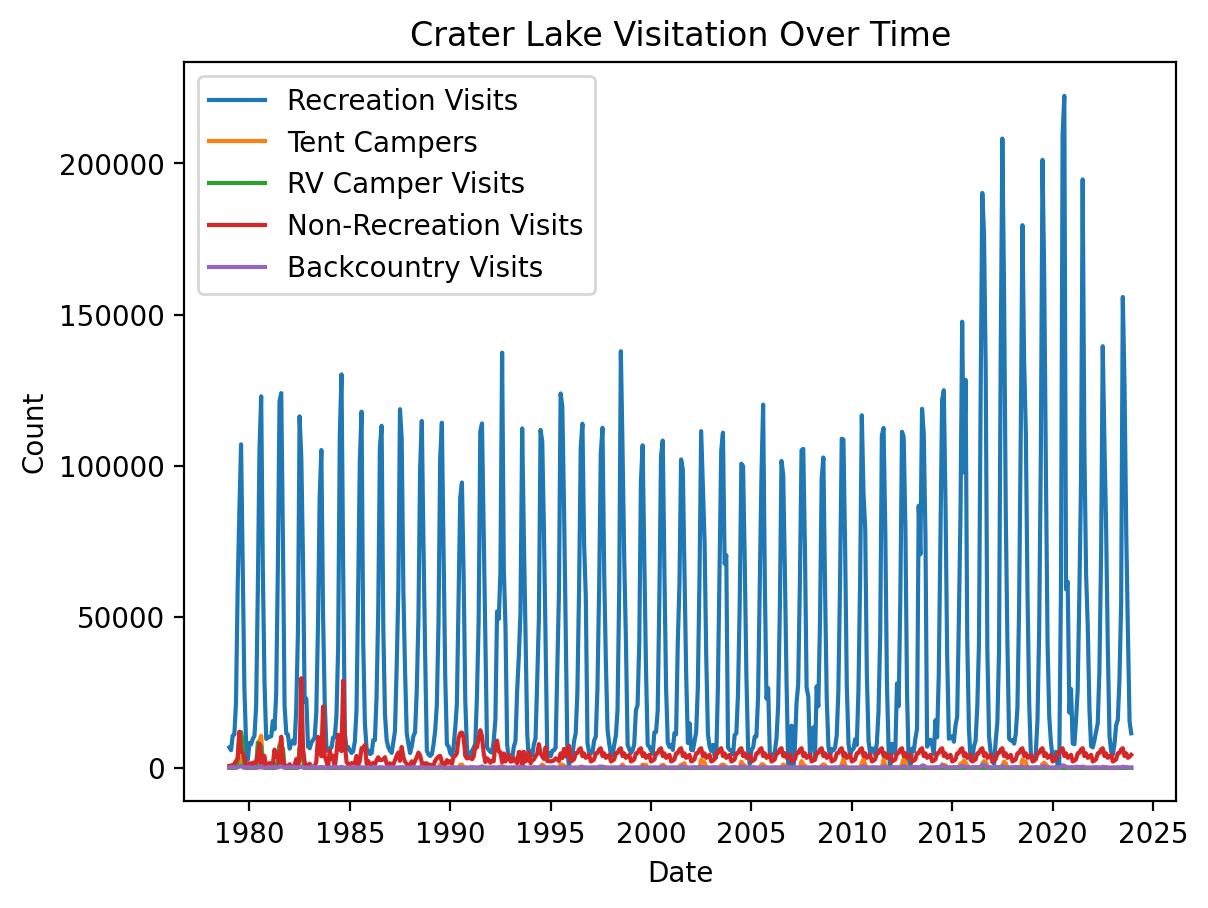

In [7]:
# make a quick plot so we can see what looks cool
plt.plot(crater_lake['date'], crater_lake['RecreationVisits'], label='Recreation Visits')
plt.plot(crater_lake['date'], crater_lake['TentCampers'], label='Tent Campers')
plt.plot(crater_lake['date'], crater_lake['RVCampers'], label='RV Camper Visits')
plt.plot(crater_lake['date'], crater_lake['NonRecreationVisits'], label='Non-Recreation Visits')
plt.plot(crater_lake['date'], crater_lake['Backcountry'], label='Backcountry Visits')
plt.title('Crater Lake Visitation Over Time'); plt.legend()
plt.xlabel('Date'); plt.ylabel('Count')

In [8]:
# take an average of visitation at crater lake for each month
crater_lake_avg = crater_lake.groupby(by='Month')[['RecreationVisits', 'NonRecreationVisits', 'TentCampers', 'RVCampers', 'Backcountry']].mean().reset_index()
crater_lake_avg

,Month,RecreationVisits,NonRecreationVisits,TentCampers,RVCampers,Backcountry
0,1,6072.777778,1987.444444,0.000000,0.000000,84.155556
1,2,5896.955556,2086.288889,0.000000,0.000000,115.088889
2,3,8822.266667,2448.266667,0.000000,0.000000,226.688889
3,4,12681.488889,4069.933333,0.000000,0.000000,136.044444
4,5,28750.600000,4468.511111,9.600000,15.800000,69.955556
5,6,62994.955556,5861.888889,210.266667,300.222222,105.911111
6,7,119621.955556,6151.022222,1268.577778,726.088889,356.911111
7,8,117157.022222,4783.488889,1665.800000,746.666667,416.422222
8,9,73567.600000,5562.044444,835.866667,446.711111,181.200000
9,10,34369.666667,3333.800000,127.977778,26.333333,49.355556


Text(0, 0.5, 'Count')

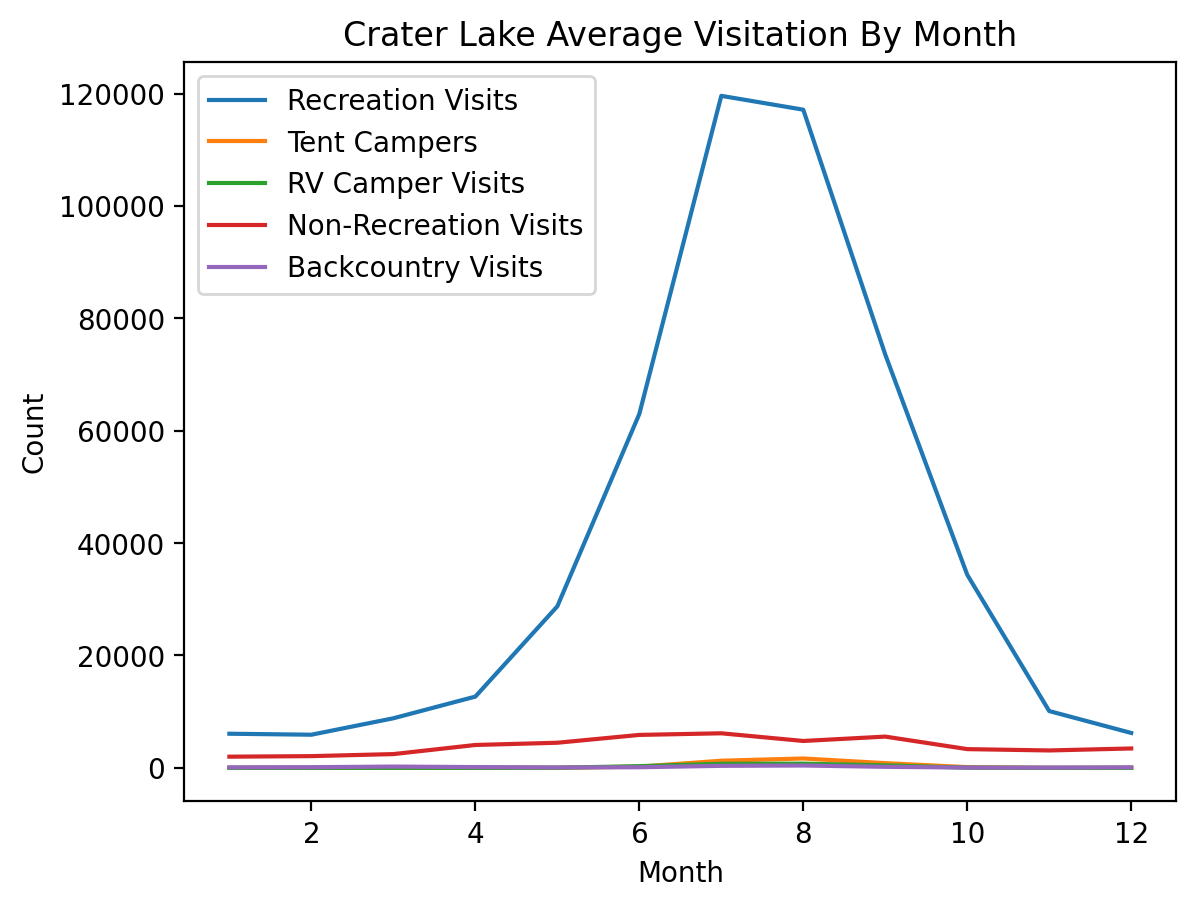

In [9]:
# make a quick plot so we can see what looks cool
plt.plot(crater_lake_avg['Month'], crater_lake_avg['RecreationVisits'], label='Recreation Visits')
plt.plot(crater_lake_avg['Month'], crater_lake_avg['TentCampers'], label='Tent Campers')
plt.plot(crater_lake_avg['Month'], crater_lake_avg['RVCampers'], label='RV Camper Visits')
plt.plot(crater_lake_avg['Month'], crater_lake_avg['NonRecreationVisits'], label='Non-Recreation Visits')
plt.plot(crater_lake_avg['Month'], crater_lake_avg['Backcountry'], label='Backcountry Visits')
plt.title('Crater Lake Average Visitation By Month'); plt.legend()
plt.xlabel('Month'); plt.ylabel('Count')

In [10]:
crater_lake_2023 = crater_lake[crater_lake['Year'] == 2023]
crater_lake_2023

,ParkName,UnitCode,ParkType,Region,State,Year,Month,RecreationVisits,NonRecreationVisits,TentCampers,RVCampers,Backcountry,date
11602,Crater Lake NP,CRLA,National Park,Pacific West,OR,2023,1,4384,2100,0,0,11,2023-01-01
16894,Crater Lake NP,CRLA,National Park,Pacific West,OR,2023,2,8143,2400,0,0,81,2023-02-01
16315,Crater Lake NP,CRLA,National Park,Pacific West,OR,2023,3,14062,2800,0,0,69,2023-03-01
19844,Crater Lake NP,CRLA,National Park,Pacific West,OR,2023,4,15850,4800,0,0,167,2023-04-01
16594,Crater Lake NP,CRLA,National Park,Pacific West,OR,2023,5,29030,4900,0,0,75,2023-05-01
15134,Crater Lake NP,CRLA,National Park,Pacific West,OR,2023,6,54566,6100,0,0,48,2023-06-01
23789,Crater Lake NP,CRLA,National Park,Pacific West,OR,2023,7,155809,6500,0,0,406,2023-07-01
21153,Crater Lake NP,CRLA,National Park,Pacific West,OR,2023,8,127179,3900,0,0,224,2023-08-01
21154,Crater Lake NP,CRLA,National Park,Pacific West,OR,2023,9,78550,4800,0,0,224,2023-09-01
17704,Crater Lake NP,CRLA,National Park,Pacific West,OR,2023,10,45595,3300,0,0,100,2023-10-01


Text(0, 0.5, 'Count')

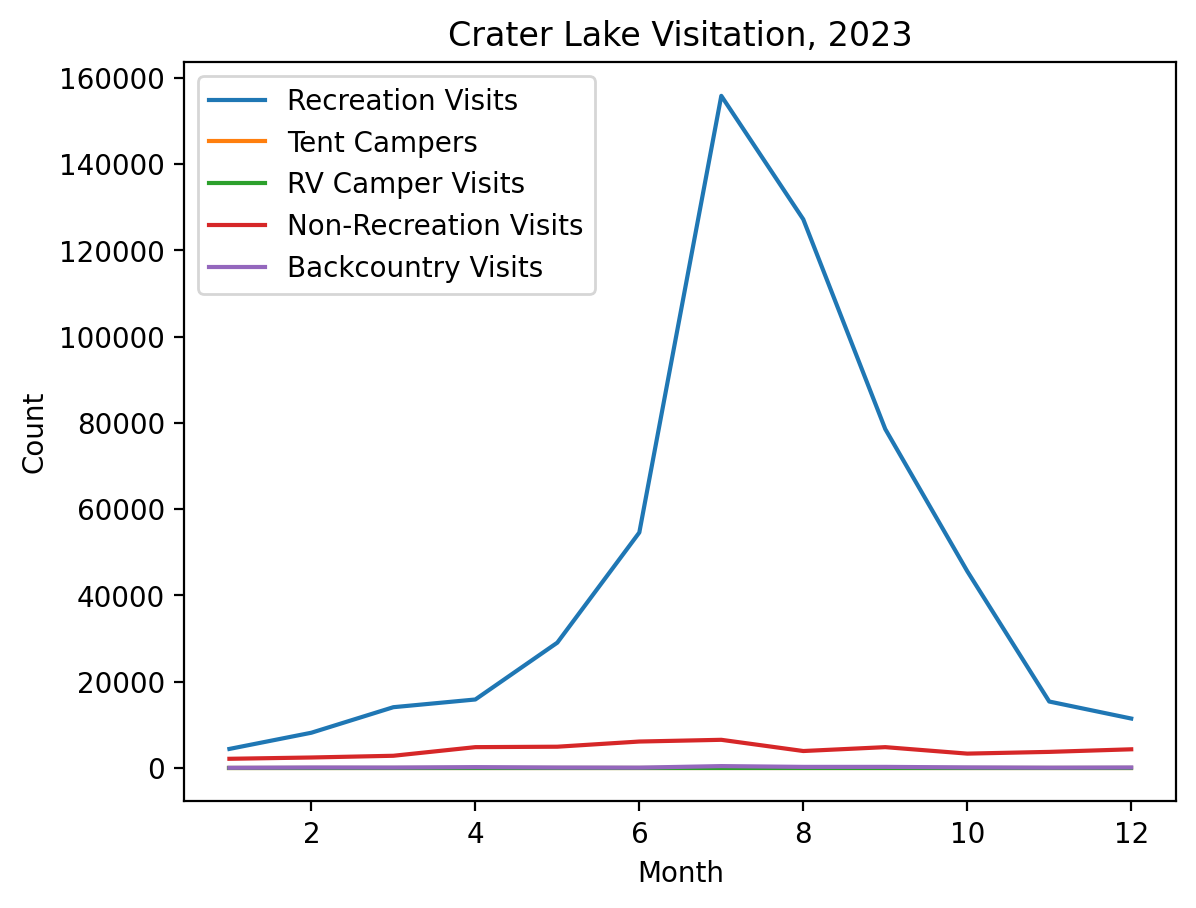

In [11]:
# make a quick plot so we can see what looks cool
plt.plot(crater_lake_2023['Month'], crater_lake_2023['RecreationVisits'], label='Recreation Visits')
plt.plot(crater_lake_2023['Month'], crater_lake_2023['TentCampers'], label='Tent Campers')
plt.plot(crater_lake_2023['Month'], crater_lake_2023['RVCampers'], label='RV Camper Visits')
plt.plot(crater_lake_2023['Month'], crater_lake_2023['NonRecreationVisits'], label='Non-Recreation Visits')
plt.plot(crater_lake_2023['Month'], crater_lake_2023['Backcountry'], label='Backcountry Visits')
plt.title('Crater Lake Visitation, 2023'); plt.legend()
plt.xlabel('Month'); plt.ylabel('Count')

I think that it could be really interesting to hear how the recreation visits fluctuate over time - especially since looking at that first graph, it almost looks like a sin wave!

In [12]:
display(crater_lake['NonRecreationVisits'].describe());

count      540.000000
mean      3941.422222
std       2598.591926
min         22.000000
25%       2400.000000
50%       3700.000000
75%       4800.000000
max      29685.000000
Name: NonRecreationVisits, dtype: float64

In [13]:
from music21 import stream, note, midi

In [ ]:
# Scaling function for MIDI values
def scale_value(value, old_min, old_max, new_min, new_max):
    return ((value - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

# Get min/max for scaling
pitch_min, pitch_max = crater_lake['RecreationVisits'].min(), crater_lake['RecreationVisits'].max()
vel_min, vel_max = crater_lake['NonRecreationVisits'].min(), crater_lake['NonRecreationVisits'].max()

# Normalize columns
crater_lake['Pitch'] = crater_lake['RecreationVisits'].apply(lambda x: int(scale_value(x, pitch_min, pitch_max, 40, 100)))
crater_lake['Velocity'] = crater_lake['NonRecreationVisits'].apply(lambda x: int(scale_value(x, vel_min, vel_max, 20, 127)))

In [15]:
# Create a MIDI Stream
midi_stream = stream.Stream()

# Assign an instrument (e.g., piano)
midi_instrument = mus.instrument.Piano()
midi_stream.append(midi_instrument)

for idx, row in crater_lake.iterrows():
    n = note.Note(row['Pitch'])  # Assign pitch
    n.quarterLength = 0.5  # Fixed duration (adjust if needed)
    n.volume.velocity = row['Velocity']  # Assign velocity
    midi_stream.append(n)

# Save as MIDI
midi_fp = "crater_lake.mid"
midi_stream.write('midi', fp=midi_fp)
print(f"MIDI file saved as {midi_fp}")


MIDI file saved as crater_lake.mid
